In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import copy
from scipy import ndimage
from PIL import Image
import os

import seaborn as sns

#models import
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#evaluation scores import
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
#setting the path for the folder to read ... 
path1 = 'C:\code files\machine learning\dogs vs cats classification\dataset'

#setting important values 
height = 32
width = 32

classes = ['cat', 'dog']

In [5]:
#function to load images from directory into array
def create_dataset(directory):
    img_array = []
    class_name = []
    m = 0
    
    for dir1 in os.listdir(directory):
        #print(dir1)
        for file in os.listdir(os.path.join(directory,dir1)):
            image_path = os.path.join(directory, dir1, file)
            try:
                grayscale_image = np.array(Image.open(image_path).convert('L'))
                    # Convert to grayscale
                #grayscale_image = image
    
                # Resize the image
                image = np.resize(grayscale_image, (width,height))
                image = image.astype('float32')
                image /= 255
                img_array.append(image)
                if dir1 == 'Dog':
                    m = 1
                else:
                    m = 0
                class_name.append(m)
            except e:
                pass
    
    return img_array, class_name
            

In [6]:
#creating dataset and pre-processing the data
X_train, Y_train = create_dataset(os.path.join(path1,'Train'))
X_test, Y_test = create_dataset(os.path.join(path1,'Test'))

m_test = len(X_test)
m_train = len(X_train)

#flattening data and setting approprate dimensions  i.e , (number of data ,  height*width*3)
X_train_array = np.asarray(X_train).reshape(m_train, -1).T
X_test_array = np.asarray(X_test).reshape(m_test, -1).T
Y_train_array = np.asarray(Y_train).reshape(len(Y_train),1).T
Y_test_array = np.asarray(Y_test).reshape(len(Y_test),1).T

C:\Users\hp\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [7]:
print(X_train_array.T.shape)
print(X_test_array.T.shape)
print(Y_train_array.T.shape)
print(Y_test_array.T.shape)

(20599, 1024)
(4400, 1024)
(20599, 1)
(4400, 1)


In [8]:
def plot_confusion_matrix(y_true, y_pred, classes, name):
    """
    Plot a confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: Class names (list)
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix of {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


In [9]:
def rf_clf(X_train, X_test, y_train , y_test, classes):

    model =  RandomForestClassifier(n_estimators=100, random_state=42)

    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    cm = confusion_matrix(y_test, y_pred)

    plot_confusion_matrix(y_test, y_pred,classes, 'Random Forest')


    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model

In [10]:
def svm_clf(X_train, X_test, y_train, y_test, classes):
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, classes, 'SVM')

    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model


In [11]:
def dt_clf(X_train, X_test, y_train, y_test, classes):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, classes, 'Decision Tree')

    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model


In [12]:
def knn_clf(X_train, X_test, y_train, y_test, classes):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, classes, 'KNN')

    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model

Accuracy: 0.5515909090909091


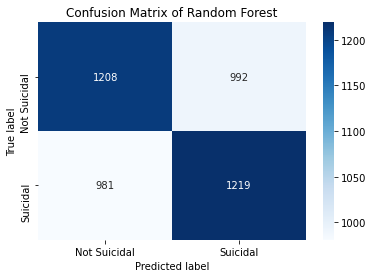


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      2200
           1       0.55      0.55      0.55      2200

    accuracy                           0.55      4400
   macro avg       0.55      0.55      0.55      4400
weighted avg       0.55      0.55      0.55      4400



In [13]:
random_forest_model = rf_clf(X_train_array.T, X_test_array.T, Y_train_array.T.ravel(), Y_test_array.T.ravel(), classes)

Accuracy: 0.5175


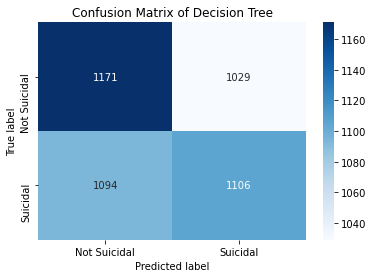


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      2200
           1       0.52      0.50      0.51      2200

    accuracy                           0.52      4400
   macro avg       0.52      0.52      0.52      4400
weighted avg       0.52      0.52      0.52      4400



In [14]:
decision_tree_model = dt_clf(X_train_array.T, X_test_array.T, Y_train_array.T.ravel(), Y_test_array.T.ravel(), classes)

Accuracy: 0.5127272727272727


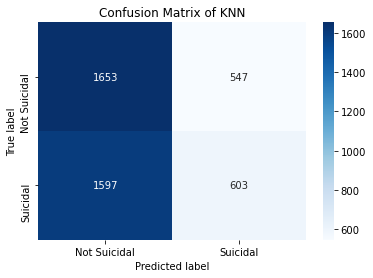


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.75      0.61      2200
           1       0.52      0.27      0.36      2200

    accuracy                           0.51      4400
   macro avg       0.52      0.51      0.48      4400
weighted avg       0.52      0.51      0.48      4400



In [15]:
knn_model = knn_clf(X_train_array.T, X_test_array.T, Y_train_array.T.ravel(), Y_test_array.T.ravel(), classes)

Accuracy: 0.5068181818181818


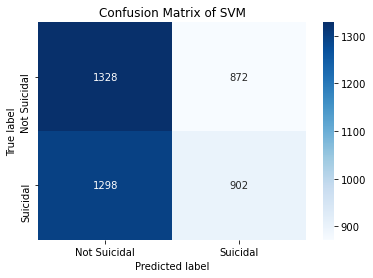


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55      2200
           1       0.51      0.41      0.45      2200

    accuracy                           0.51      4400
   macro avg       0.51      0.51      0.50      4400
weighted avg       0.51      0.51      0.50      4400



In [16]:
svm_model = svm_clf(X_train_array.T, X_test_array.T, Y_train_array.T.ravel(), Y_test_array.T.ravel(), classes)